In [1]:
# Загрузка библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
from sklearn import datasets # для импорта данных
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline

In [6]:
admitDF = pd.read_csv('Admission_Predict_Ver1.1.csv')
admitDF

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [7]:
admitDF.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [8]:
admitDF.columns = [column.replace(' ','') for column in admitDF.columns]
admitDF.columns = [column.replace('.','') for column in admitDF.columns]
admitDF.columns

Index(['SerialNo', 'GREScore', 'TOEFLScore', 'UniversityRating', 'SOP', 'LOR',
       'CGPA', 'Research', 'ChanceofAdmit'],
      dtype='object')

In [10]:
# GREScore ( out of 340 ) — баллы по GRE тестированию
# TOEFLScore ( out of 120 ) — баллы по экзамену TOEFL
# UniversityRating ( out of 5 ) — рейтинг университета 
# SOP - Statement of Purpose Strength ( out of 5 ) — весомость мотивационного письма
# LOR - Letter of Recommendation Strength ( out of 5 ) — весомость рекомендационных писем
# CGPA - Undergraduate GPA ( out of 10 ) — средний балл в бакалавриате
# Research - Research Experience ( either 0 or 1 ) — наличие опыта исследовательской работы ( нет / есть)

In [15]:
admitDF.drop(['SerialNo'], axis = 1, inplace=True)
C = admitDF.corr(method='pearson')
C

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
GREScore,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFLScore,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
UniversityRating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
ChanceofAdmit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<AxesSubplot:>

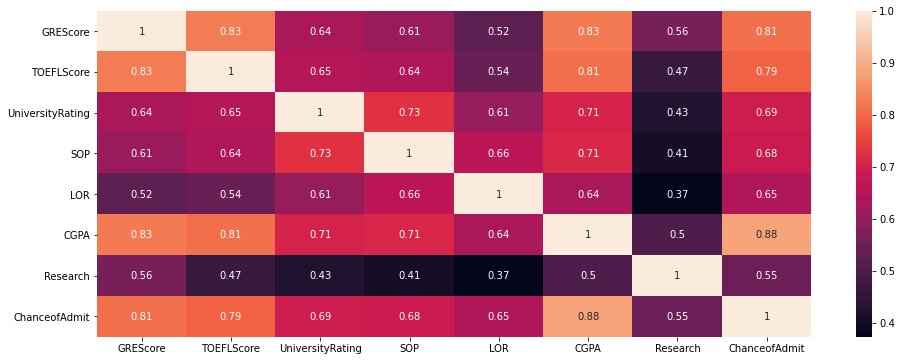

In [16]:
# представим корреляционную матрицу в виде "тепловой карты" с помощью функции heatmap из библиотеки seaborn
plt.figure(figsize=(16,6)) # размер графика
sns.heatmap(data=C, annot=True)

<AxesSubplot:>

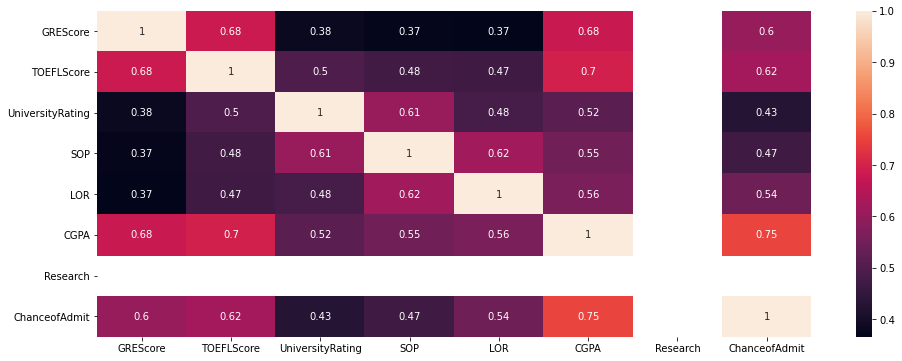

In [17]:
C_0 = admitDF.loc[admitDF['Research'] == 0].corr(method='pearson')
plt.figure(figsize=(16,6)) # размер графика
sns.heatmap(data=C_0, annot=True)

<AxesSubplot:>

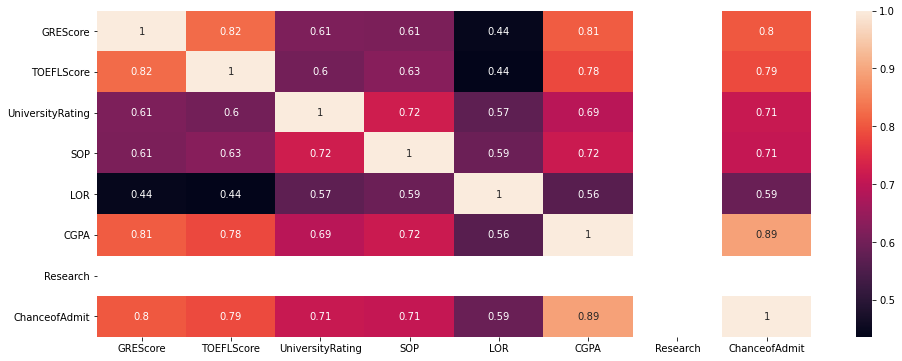

In [18]:
C_1 = admitDF.loc[admitDF['Research'] == 1].corr(method='pearson')
plt.figure(figsize=(16,6)) # размер графика
sns.heatmap(data=C_1, annot=True)

In [20]:
Data = admitDF.loc[admitDF['Research'] == 0][['TOEFLScore','CGPA']]
Data

,TOEFLScore,CGPA
4,103,8.21
7,101,7.90
8,102,8.00
9,108,8.60
15,105,8.30
...,...,...
487,115,9.14
489,110,8.50
491,99,7.81
498,103,8.43


In [21]:
np.shape(Data)

(220, 2)

In [23]:
# Создаем вектор из единиц для коэффициента w_0 и записываем все векторы в СТОЛБЦЫ матрицы признаков А
TOEFLScore=Data['TOEFLScore']
CGPA= Data['CGPA']
A= np.column_stack((np.ones(220), TOEFLScore, CGPA))
# Добавим настройку для удобного чтения значений А
np.set_printoptions(suppress=True)
A

array([[  1.  , 103.  ,   8.21],
       [  1.  , 101.  ,   7.9 ],
       [  1.  , 102.  ,   8.  ],
       [  1.  , 108.  ,   8.6 ],
       [  1.  , 105.  ,   8.3 ],
       [  1.  , 107.  ,   8.7 ],
       [  1.  , 110.  ,   8.8 ],
       [  1.  , 102.  ,   8.5 ],
       [  1.  , 114.  ,   8.4 ],
       [  1.  , 109.  ,   8.8 ],
       [  1.  ,  93.  ,   7.2 ],
       [  1.  ,  99.  ,   7.3 ],
       [  1.  , 106.  ,   8.4 ],
       [  1.  , 105.  ,   7.8 ],
       [  1.  , 105.  ,   7.5 ],
       [  1.  , 108.  ,   7.7 ],
       [  1.  , 117.  ,   9.1 ],
       [  1.  , 119.  ,   9.7 ],
       [  1.  , 110.  ,   8.  ],
       [  1.  , 103.  ,   7.7 ],
       [  1.  , 102.  ,   7.4 ],
       [  1.  ,  99.  ,   7.6 ],
       [  1.  , 104.  ,   8.3 ],
       [  1.  , 100.  ,   8.1 ],
       [  1.  , 101.  ,   8.2 ],
       [  1.  , 111.  ,   8.7 ],
       [  1.  , 112.  ,   8.92],
       [  1.  , 114.  ,   9.02],
       [  1.  , 106.  ,   8.9 ],
       [  1.  ,  99.  ,   8.22],
       [  

In [25]:
# Создаем целевой вектор
y = admitDF.loc[admitDF['Research'] == 0][['ChanceofAdmit']] # объект типа dataframe 
# вычислим OLS оценку для коэффициентов
w_hat=np.linalg.inv(A.T@A)@A.T@y
np.round(w_hat, 3)

,ChanceofAdmit
0,-1.045
1,0.004
2,0.148


In [26]:
TOEFLScore_new = 107
CGPA_new = 9.1
# делаем прогноз 
ChanceofAdmit_new=w_hat.iloc[0]+w_hat.iloc[1]*TOEFLScore_new+w_hat.iloc[2]*CGPA_new
ChanceofAdmit_new

ChanceofAdmit    0.776359
dtype: float64

In [31]:
# Центрирование
TOEFLScore_c = TOEFLScore - TOEFLScore.mean()
CGPA_c = CGPA - CGPA.mean()
y_c = y - y.mean()
# Нормирование: делим каждый центрированный вектор на его длину
TOEFLScore_st = TOEFLScore_c / np.linalg.norm(TOEFLScore_c)
CGPA_st = CGPA_c / np.linalg.norm(CGPA_c)
y_st=y_c / np.linalg.norm(y_c)
# Матрица центрированных признаков - БЕЗ константы!
A_st = np.column_stack(( TOEFLScore_st, CGPA_st,))
A_st

array([[-0.01390829, -0.00356568],
       [-0.04198007, -0.04826775],
       [-0.02794418, -0.03384772],
       [ 0.05627116,  0.05267241],
       [ 0.01416349,  0.00941234],
       [ 0.04223527,  0.06709243],
       [ 0.08434294,  0.08151245],
       [-0.02794418,  0.03825238],
       [ 0.1404865 ,  0.02383236],
       [ 0.07030705,  0.08151245],
       [-0.1542672 , -0.1492079 ],
       [-0.07005185, -0.13478788],
       [ 0.02819938,  0.02383236],
       [ 0.01416349, -0.06268777],
       [ 0.01416349, -0.10594783],
       [ 0.05627116, -0.07710779],
       [ 0.18259418,  0.12477251],
       [ 0.21066596,  0.21129264],
       [ 0.08434294, -0.03384772],
       [-0.01390829, -0.07710779],
       [-0.02794418, -0.12036785],
       [-0.07005185, -0.09152781],
       [ 0.0001276 ,  0.00941234],
       [-0.05601596, -0.0194277 ],
       [-0.04198007, -0.00500768],
       [ 0.09837883,  0.06709243],
       [ 0.11241472,  0.09881648],
       [ 0.1404865 ,  0.1132365 ],
       [ 0.02819938,

In [32]:
# OLS оценка коэффициентов центрированной регрессии
w_hat_st=np.linalg.inv(A_st.T@A_st)@A_st.T@y_st.values
np.round(w_hat_st,2)

array([[0.19],
       [0.62]])